# Lab 1: Regression

### 11th February 2014 Gaussian Process Road Show, Pereira, Colombia

## written by Neil Lawrence

$$\newcommand{\inputScalar}{x}
\newcommand{\inputVector}{\mathbf{x}}
\newcommand{\inputMatrix}{\mathbf{X}}
\newcommand{\dataScalar}{y}
\newcommand{\dataVector}{\mathbf{y}}
\newcommand{\dataMatrix}{\mathbf{Y}}
\newcommand{\lengthScale}{\ell}
\newcommand{\mappingScalar}{w}
\newcommand{\mappingVector}{\mathbf{w}}
\newcommand{\mappingFunctionScalar}{f}
\newcommand{\mappingFunctionVector}{\mathbf{f}}
\newcommand{\dataStd}{\sigma}
\newcommand{\numData}{n}
\newcommand{\gaussianDist}[3]{\mathcal{N}\left(#1|#2,#3\right)}
\newcommand{\gaussianSamp}[2]{\mathcal{N}\left(#1,#2\right)}
\newcommand{\zerosVector}{\mathbf{0}}
\newcommand{\eye}{\mathbf{I}}
\newcommand{\noiseScalar}{\epsilon}
\newcommand{\noiseVector}{\mathbf{\epsilon}}
\newcommand{\noiseMatrix}{\mathbf{\Epsilon}}
\newcommand{\basisMatrix}{\mathbf{\Phi}}
\newcommand{\basisVector}{\mathbf{\phi}}
\newcommand{\basisScalar}{\phi}
\newcommand{\expSamp}[1]{\left<#1\right>}
\newcommand{\expDist}[2]{\left<#1\right>_{#2}}
\newcommand{\covarianceMatrix}{\mathbf{C}}
\newcommand{\meanVector}{\boldsymbol{\mu}}
\newcommand{\kernelScalar}{k}
\newcommand{\kernelVector}{\mathbf{\kernelScalar}}
\newcommand{\kernelMatrix}{\mathbf{K}}
\newcommand{\meanScalar}{\mu}
\newcommand{\ltwoNorm}[1]{\left\Vert #1 \right\Vert_2}$$

Welcome to the IPython notebook! We will be using the IPython notebook for all our lab classes and assignments. It is a really convenient way to interact with data using python. In this first lab session we are going to familiarise ourselves with the notebook and start getting used to python whilst we review some of the material from the first lecture.

Python is a generic programming language with 'numerical' and scientific capabilities added on through the numpy and scipy libraries. There are excellent 2-D plotting facilities available through matplotlib.


### Importing Libraries

The numpy library provides most of the manipulations we need for arrays in python. numpy is short for numerical python, but as well as providing the numerics, numpy provides contiguous array objects. These objects weren't available in the original python. The first step is to import numpy. We'll then use it to draw samples from a "standard normal". A standard normal is a Gaussian density with mean of zero and variance of one. We'll draw 10 samples from the standard normal.

In [1]:
%pylab inline
import numpy as np
import pylab as pb
import GPy


Populating the interactive namespace from numpy and matplotlib


To get help about any command in the notebook simply type that command followed by a question mark.

In [2]:
np.random.normal?
X = np.random.normal(0, 1, size=(10))

Now let's look at the samples, we can show them using the print command.

In [17]:
print X

[ 0.23003447  1.17754486 -0.93086706 -2.18468982 -0.07023085 -0.87423579
  0.25157597  0.37024633  1.02862712 -0.36012013]


## Estimating Moments

We can compute the sample mean by adding all the samples together and dividing by the number of samples.

In [18]:
X.mean()

-0.13621148958699228

which is easy to write in code as follows

In [19]:
X.var()

0.90507287852221441

We know in this case, because we sampled from a standard normal, that the mean and variance of the distribution should be 0 and 1. Why do you not get a mean of 0 and a variance of 1? Let's explore what happens as we increase the number of samples. To do this we are going to use for loops and python lists. We start by creating empty lists for the means and variances. Then we create a list of integers to iterate through. In Python, a for loop always iterates through a list (in some languages this is called a foreach loop, its counterpart the counter for loop only exists by creating a list of integers, see http://en.wikipedia.org/wiki/Foreach_loop#Python). We can use the range command to create the numbers of samples. 

In [20]:
means = []
variances = []
samples = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000] 
for n in samples:
    x = np.random.randn(n)
    mean = x.mean()
    variance = (x**2).mean() - mean**2
    means.append(mean)
    variances.append(variance)


# Plotting in Python

We'll now plot the variance and the mean against the number of samples. To do this, we need to first convert the samples, varianes and means from Python lists, to numpy arrays.

In [21]:
means = np.asarray(means)
variances = np.asarray(variances)
samples = np.asarray(samples)
print means

[-0.33035077  0.27751836 -0.09566599  0.04225903  0.0195657   0.00064262
  0.00059868 -0.00456494  0.00575768]


Next we need to include the plotting functionality from matplotlib, and instruct IPython notebook to include the plots *inline* with the notebook, rather than in a different window. First we import the plotting library, matplotlib.

Here we plot the estimated mean against the number of samples. However, since the samples go up logarithmically it's better to use a logarithmic axis for the x axis, as follows.

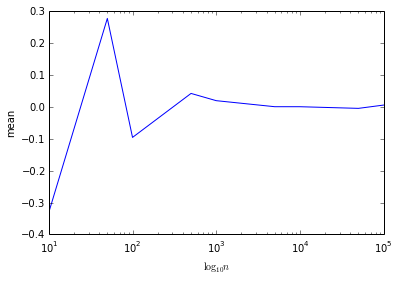

In [22]:
plt.semilogx(samples, means)
xlabel('$\log_{10}n$')
ylabel('mean')

We can do the same for the variances, again using a logarithmic axis for the samples. This time, we're going to lavel the x axis using a latex formula.

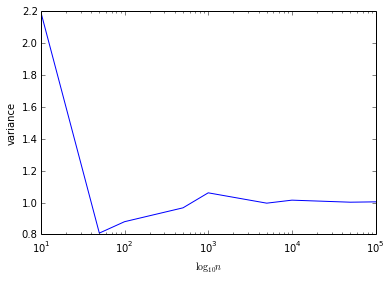

In [23]:
plt.semilogx(samples, variances)
xlabel('$\log_{10}n$')
ylabel('variance')

## Linear Regression: Iterative Solution

Next we will code linear regression in python. We will do it in two ways, once using iterative updates (coordinate ascent) and then using linear algebra. 
For this part we are going to load in some real data, we will use the example from the Olympics: the pace of Marathon winners. To load their data (which is in comma separated values [csv] format) we first need to download it from [this link](http://staffwww.dcs.shef.ac.uk/people/N.Lawrence/dataset_mirror/olympic_marathon_men/olympicMarathonTimes.csv "olympic marathon data"), and then load it as follows:

In [25]:
data = GPy.util.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

You can se what these values are by typing:

In [27]:
print(x)
print(y)

[[ 1896.]
 [ 1900.]
 [ 1904.]
 [ 1908.]
 [ 1912.]
 [ 1920.]
 [ 1924.]
 [ 1928.]
 [ 1932.]
 [ 1936.]
 [ 1948.]
 [ 1952.]
 [ 1956.]
 [ 1960.]
 [ 1964.]
 [ 1968.]
 [ 1972.]
 [ 1976.]
 [ 1980.]
 [ 1984.]
 [ 1988.]
 [ 1992.]
 [ 1996.]
 [ 2000.]
 [ 2004.]
 [ 2008.]
 [ 2012.]]
[[ 4.47083333]
 [ 4.46472926]
 [ 5.22208333]
 [ 4.15467867]
 [ 3.90331675]
 [ 3.56951267]
 [ 3.82454477]
 [ 3.62483707]
 [ 3.59284275]
 [ 3.53880792]
 [ 3.67010309]
 [ 3.39029111]
 [ 3.43642612]
 [ 3.20583007]
 [ 3.13275665]
 [ 3.32819844]
 [ 3.13583758]
 [ 3.0789588 ]
 [ 3.10581822]
 [ 3.06552909]
 [ 3.09357349]
 [ 3.16111704]
 [ 3.14255244]
 [ 3.08527867]
 [ 3.10265829]
 [ 2.99877553]
 [ 3.03392977]]


### Plotting the Data

And you can make a plot of $y$ vs $x$ with the following command:

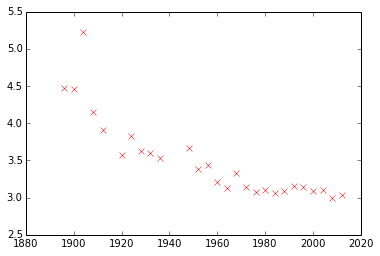

In [28]:
plt.plot(x, y, 'rx')

### Maximum Likelihood: Iterative Solution

Now we are going to fit a line, $y_i=mx_i + c$, to the data you've plotted. We are trying to minimize the error function:

$$E(m, c, \sigma^2) = \frac{N}{2} \log \sigma^2 + \frac{1}{2\sigma^2} \sum_{i=1}^N(y_i-mx_i-c)^2$$

with respect to $m$, $c$ and $\sigma^2$. We can start with an initial guess for $m$, 

In [29]:
m = -0.4
c = 80 

Then we use the maximum likelihood update, derived in the lecture, to find an estimate for the offset, $c$,

$$c^* = \frac{\sum_{i=1}^N(y_i-m^*x_i)}{N}$$

In [30]:
c = (y - m*x).mean()
print c

786.019771145


And now we can make an estimate for the gradient of the line,

$$m^* = \frac{\sum_{i=1}^N ((y_i - c)*x_i))}{\sum_{i=1}^N x_i^2}$$

In [31]:
m = ((y - c)*x).sum()/(x**2).sum()
print m

-0.3998724073


We can have a look at how good our fit is by computing the prediction across the input space. First create a vector of 'test points',

In [32]:
x_test = np.linspace(1890, 2020, 130)[:, None]

Now use this vector to compute some test predictions,

In [33]:
f_test = m*x_test + c

Now plot those test predictions with a blue line on the same plot as the data,

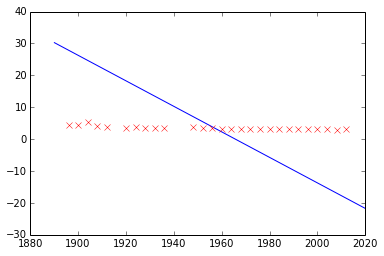

In [34]:
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

The fit isn't very good, we need to iterate between these parameter updates in a loop to improve the fit, we have to do this several times,

In [35]:
for i in np.arange(10):
    m = ((y - c)*x).sum()/(x*x).sum()
    c = (y-m*x).sum()/y.shape[0]
print(m)
print(c)

-0.398725964251
783.527379727


And let's try plotting the result again

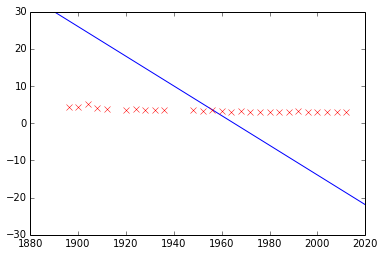

In [36]:
f_test = m*x_test + c
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

Clearly we need more iterations than 10! Let's try add more iterations above to try and get closer to the solution. How many iterations does it need to get a reasonable answer?

### Direct Solution with Linear Algebra

Hopefully, you are now persuaded of the merits of solving the entire system, simultaneously, using linear algebra. To do that, we need to make a design matrix of the data, which includes the $x_0=1$ column, to represent the bias, remember (from the lecture notes) that we are now moving to a system where our prediction is given by an inner product:

$$f(\mathbf{x}_i) = \mathbf{x}_i^\top\mathbf{w}$$

where each vector $\mathbf{x}_i$ is given by appending a 1 onto the original vector

$$\mathbf{x}_i = 
\begin{bmatrix} 
1 \\\
x_i
\end{bmatrix}$$

We can do this for the entire data set to form a design matrix $\mathbf{X}$,

$$\mathbf{X} = \begin{bmatrix} 
\mathbf{x}_1^\top \\\ 
\mathbf{x}_2^\top \\\ 
\vdots \\\
\mathbf{x}_N^\top
\end{bmatrix} = \begin{bmatrix}
1 & x_1 \\\
1 & x_2 \\\
\vdots & \vdots \\\
1 & x_N 
\end{bmatrix},$$

which in numpy is done with the following commands:

In [37]:
X = np.hstack((np.ones_like(x), x))
print(X)

[[  1.00000000e+00   1.89600000e+03]
 [  1.00000000e+00   1.90000000e+03]
 [  1.00000000e+00   1.90400000e+03]
 [  1.00000000e+00   1.90800000e+03]
 [  1.00000000e+00   1.91200000e+03]
 [  1.00000000e+00   1.92000000e+03]
 [  1.00000000e+00   1.92400000e+03]
 [  1.00000000e+00   1.92800000e+03]
 [  1.00000000e+00   1.93200000e+03]
 [  1.00000000e+00   1.93600000e+03]
 [  1.00000000e+00   1.94800000e+03]
 [  1.00000000e+00   1.95200000e+03]
 [  1.00000000e+00   1.95600000e+03]
 [  1.00000000e+00   1.96000000e+03]
 [  1.00000000e+00   1.96400000e+03]
 [  1.00000000e+00   1.96800000e+03]
 [  1.00000000e+00   1.97200000e+03]
 [  1.00000000e+00   1.97600000e+03]
 [  1.00000000e+00   1.98000000e+03]
 [  1.00000000e+00   1.98400000e+03]
 [  1.00000000e+00   1.98800000e+03]
 [  1.00000000e+00   1.99200000e+03]
 [  1.00000000e+00   1.99600000e+03]
 [  1.00000000e+00   2.00000000e+03]
 [  1.00000000e+00   2.00400000e+03]
 [  1.00000000e+00   2.00800000e+03]
 [  1.00000000e+00   2.01200000e+03]]


From the multivariate regression solution we derived in the lecture, the maximum likelihood solution for $\mathbf{w}^*$ is given by

$$\mathbf{w}^* = \left[\mathbf{X}^\top \mathbf{X}\right]^{-1} \mathbf{X}^\top \mathbf{y}$$ 

First let's persuade ourselves of a few things. We suggested in the lecture that

$$\sum_{i=1}^N \mathbf{x}_i\mathbf{x}_i^\top = \mathbf{X}^\top\mathbf{X}$$

We can show that this is, indeed the case for our data. First we need to know how to do matrix multiplication and transpose using numpy, this is done as

In [38]:
np.dot(X.T, X)

array([[  2.70000000e+01,   5.28200000e+04],
       [  5.28200000e+04,   1.03365648e+08]])

Now we will compute the same thing with a for loop

In [39]:
store = np.zeros((2, 2))
for i in np.arange(X.shape[0]):
    store += np.outer(X[i, :], X[i, :])
print store


[[  2.70000000e+01   5.28200000e+04]
 [  5.28200000e+04   1.03365648e+08]]


I hope that you agree that the first version is a little more compact. But is it quicker? We'll use the `time` module to find out.

In [40]:
# Create a larger matrix for test
A = np.random.normal(loc=0.0, scale=1.0, size=(10000, 4))
import time
start = time.time()
np.dot(A.T, A)
end = time.time()
print "Matrix multiplication: ", end - start

start = time.time()
store = np.zeros((A.shape[1], A.shape[1]))
for i in np.arange(A.shape[0]):
    store += np.outer(A[i, :], A[i, :])
end = time.time()
print "For loop over outer products: ", end - start

Matrix multiplication:  0.000172138214111
For loop over outer products:  0.0552158355713


### Solving the System

The solution for $\mathbf{w}$ is given in terms of a matrix inverse, but numerically this isn't the best way to compute it. What we actually want python to do is to *solve* the system of linear equations given by

$$\mathbf{X}^\top\mathbf{X} \mathbf{w} = \mathbf{X}^\top\mathbf{y}$$

for $\mathbf{w}$. This can be done in numpy using the command

In [42]:
np.linalg.solve?

so we can obtain the solution using

In [43]:
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
print w

[[  2.88952457e+01]
 [ -1.29806477e-02]]


Allowing us to plot the fit as follows

[-0.01298065]
[ 28.89524574]


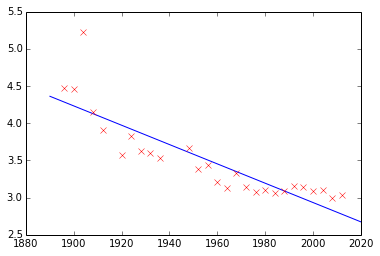

In [45]:
m = w[1]; c=w[0]
f_test = m*x_test + c
print(m)
print(c)
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

## Quadratic Fit

Now we will fit a quadratic model using basis functions. Given everything we've learnt above, this is now quite easy to do. Firstly, we need to create a design matrix that contains the quadratic basis, 

$$\mathbf{\Phi} = \left[ \mathbf{1} \quad \mathbf{x} \quad \mathbf{x}^2\right]$$

where this notation means that each column of $\mathbf{\Phi}$ is derived from the entire set of input years.

In [46]:
Phi = np.hstack([np.ones(x.shape), x, x**2])

Now we can solve this system for $\mathbf{w}$ just as we did for the linear case, so we have,

In [47]:
w = np.linalg.solve(np.dot(Phi.T, Phi), np.dot(Phi.T, y))
print(w)

[[  6.43641954e+02]
 [ -6.42502988e-01]
 [  1.61109704e-04]]


We can plot the solution in two different ways, either we take

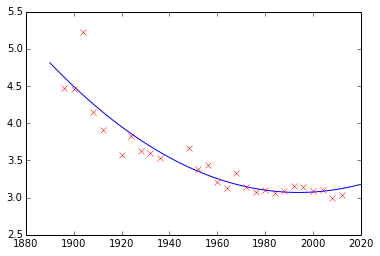

In [48]:
f_test = w[2]*x_test**2 + w[1]*x_test + w[0]
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

Or we can do the matrix form of this equation which first involves creating a design matrix for the test points,


In [49]:
Phi_test = np.hstack((np.ones_like(x_test), x_test, x_test**2))

and then computing the value of the function using a matrix multiply

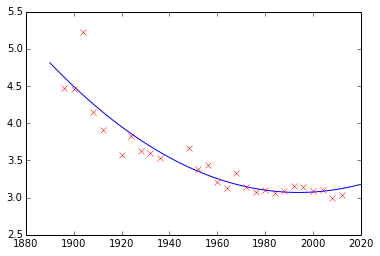

In [50]:
f_test = np.dot(Phi_test,w)
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

Note the values of the coefficient $w_2$ in particular. It is relatively small, because it is multiplying a large number (square of 2000 is 4 million). This need to use small coefficients becomes worse as we increase the order of the fit. As an exercise for later, try fitting higher order polynomials to the data. See what happens as you increase the polynomial order.

## Generalization

The aim of this notebook is to review the different methods of model selection: hold out validation, leave one out cross validation and cross validation. 

## Training Error

The first thing we'll do is plot the training error for the polynomial fit. To do this let's set up some parameters.

In [51]:
num_data = x.shape[0]
num_pred_data = 100 # how many points to use for plotting predictions
x_pred = linspace(1890, 2016, num_pred_data)[:, None] # input locations for predictions
order = 4 # The polynomial order to use.
                 

now let's build the basis matrices.


In [52]:
# build the basis set
Phi = np.zeros((num_data, order+1))
Phi_pred = np.zeros((num_pred_data, order+1))
for i in range(0, order+1):
    Phi[:, i:i+1] = x**i
    Phi_pred[:, i:i+1] = x_pred**i



now we can solve for the regression weights and make predictions both for the training data points, and the test data points. That involves solving the linear system given by

$$\basisMatrix^\top \basisMatrix \mappingVector^* = \basisMatrix^\top \dataVector$$

In [53]:
# solve the linear system
w_star = np.linalg.solve(np.dot(Phi.T, Phi), np.dot(Phi.T, y))

and using the resulting vector to make predictions at the training points and test points,

$$\mathbf{f} = \basisMatrix \mappingVector.$$

To implement this in practice we need to use basis matrices for both the predictions and the training points.

In [55]:
# predict at training and test points
f = np.dot(Phi, w_star)
f_pred = np.dot(Phi_pred, w_star)
print f

[[ 4.73840377]
 [ 4.55506635]
 [ 4.38969096]
 [ 4.24084832]
 [ 4.1071744 ]
 [ 3.88020306]
 [ 3.78450397]
 [ 3.69917026]
 [ 3.62316429]
 [ 3.55551366]
 [ 3.39394914]
 [ 3.35130152]
 [ 3.31312642]
 [ 3.27884307]
 [ 3.24793601]
 [ 3.21995502]
 [ 3.19451517]
 [ 3.17129679]
 [ 3.15004549]
 [ 3.13057216]
 [ 3.11275294]
 [ 3.09652926]
 [ 3.08190781]
 [ 3.06896057]
 [ 3.05782477]
 [ 3.04870292]
 [ 3.04186282]]


These can be used to compute the error

$$E(\mappingVector) =  \frac{\numData}{2} \log \dataStd^2 + \frac{1}{2\dataStd^2} \sum_{i=1}^\numData \left(\dataScalar_i - \mappingVector^\top \phi(\inputVector_i)\right)^2 \\\
E(\mappingVector) = \frac{\numData}{2} \log \dataStd^2 + \frac{1}{2\dataStd^2} \sum_{i=1}^\numData \left(\dataScalar_i - \mappingFunctionScalar_i\right)^2$$

In [56]:
# compute the sum of squares term
sum_squares = ((y-f)**2).sum()
# fit the noise variance
sigma2 = sum_squares/num_data
error = 0.5*(num_data*np.log(sigma2) + sum_squares/sigma2)

Now we have the fit and the error, let's plot the fit and the error.

The error is: -29.9427


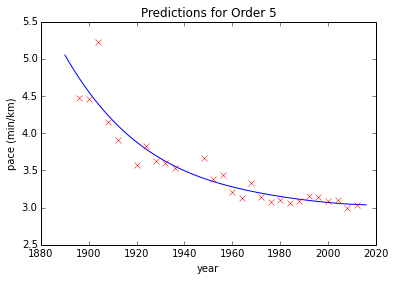

In [57]:
# print the error and plot the predictions
print("The error is: %2.4f"%error)
plt.plot(x_pred, f_pred)
plt.plot(x, y, 'rx')
ax = plt.gca()
ax.set_title('Predictions for Order 5')
ax.set_xlabel('year')
ax.set_ylabel('pace (min/km)')

Now use the loop structure below to compute the error for different model orders.


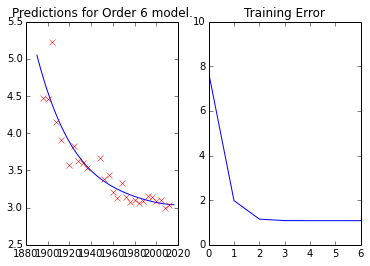

In [58]:
# import the time model to allow python to pause.
import time
# import the IPython display module to clear the output.
from IPython.display import clear_output

num_data = len(x)
error_list = []
max_order = 6
sigma2 = 1
fig, axes = plt.subplots(nrows=1, ncols=2)
for order in range(0, max_order+1):
    # 1. build the basis set
    Phi = np.zeros((num_data, order+1))
    Phi_pred = np.zeros((num_pred_data, order+1))
    for i in range(0, order+1):
        Phi[:, i] = x.flatten()**i
        Phi_pred[:, i] = x_pred.flatten()**i
    
    # 2. solve the linear system
    w = np.linalg.solve(np.dot(Phi.T, Phi), np.dot(Phi.T, y))
    # 3. make predictions at training and test points
    f_pred = np.dot(Phi_pred, w)
    f = np.dot(Phi, w)
    # 4. compute the error and append it to a list.
    error_list.append(((y-f)**2).sum() + num_data/2.*np.log(sigma2))
    # 5. plot the predictions
    axes[0].clear()
    axes[1].clear()    
    axes[0].plot(x_pred, f_pred)
    axes[0].plot(x, y, 'rx')
    axes[0].set_ylim((2.5, 5.5))
    axes[0].set_title('Predictions for Order ' + str(order) + ' model.')
    axes[1].plot(np.arange(0, order+1), np.asarray(error_list))
    axes[1].set_xlim((0, max_order))
    axes[1].set_ylim((0, 10))
    axes[1].set_title('Training Error')
    display(fig)
    time.sleep(1)
    clear_output()